In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('C:\\Users\\gf\\Desktop\\PANTECH\\machine learning\\Day19 customer spent analysis Kmeans\\dataset.csv')


In [4]:
print(df.shape)
print(df.describe())
print(df.head(5))

(1000, 2)
              INCOME        SPEND
count    1000.000000  1000.000000
mean    56103.900000  1216.770000
std     30616.314826   961.068613
min     10100.000000    38.000000
25%     29975.000000   488.250000
50%     53700.000000   962.000000
75%     77025.000000  1688.500000
max    168800.000000  6217.000000
   INCOME  SPEND
0   47500    755
1   63600   1318
2   13500    296
3   85600   2436
4   68400   1304


**segregate & zipping df**

In [5]:
Income = df['INCOME'].values
Spend = df['SPEND'].values
X = np.array(list(zip(Income,Spend)))
X

array([[47500,   755],
       [63600,  1318],
       [13500,   296],
       ...,
       [44800,  1417],
       [79000,   671],
       [53600,   973]], dtype=int64)

**Finding Optimal K Value**

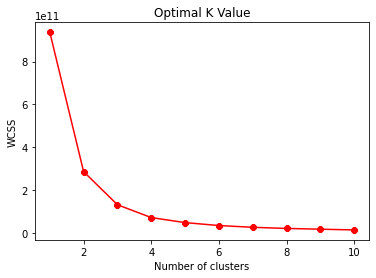

In [6]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, color='red',marker='8')
plt.title("Optimal K Value")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**Fitting the Kmeans to the dataset with k=4**

In [7]:
model = KMeans(n_clusters=4, random_state=0)
y_means = model.fit_predict(X)

**Visualizing the clusters for K=4**

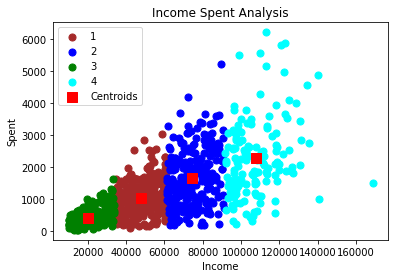

In [8]:
plt.scatter(X[y_means==0,0], X[y_means==0,1], s=50, c='brown',label='1')
plt.scatter(X[y_means==1,0], X[y_means==1,1], s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0], X[y_means==2,1], s=50, c='green',label='3')
plt.scatter(X[y_means==3,0], X[y_means==3,1], s=50, c='cyan',label='4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='red',label='Centroids')
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()
